In [20]:
from keras.models  import load_model
import keras.backend as K
from sklearn.preprocessing import normalize
import cPickle
import sys
sys.path.insert(0, '../../preprocess')
import vectorizer
from colors import color
import pandas as pd
import numpy as np

aspects = [str(i) for i in range(4)] #app, aroma, palate,taste
aspect_maps = sorted(['review/appearance', 'review/taste', 'review/aroma', 'review/palate'])

In [3]:
vec = cPickle.load(open('../../beer_data/beer_vec_ds_2000.p', 'rb'))
X = vec.X

In [2]:
model = load_model('../store/weights/beer/ThuNov3014:25:342017/loss.h5', 
                   custom_objects={'contrastive_loss' : lambda a,b:b, '<lambda>' : lambda a,b : b})

In [7]:
model_aspect = {}
for aspect in aspects :
    model_aspect[aspect] = K.function(model.get_layer('pred_'+aspect).get_layer('pool_'+aspect).inputs + [K.learning_phase()], 
                          [model.get_layer('pred_'+aspect).get_layer('pool_'+aspect).get_output_at(0)])

In [8]:
filters_pico = {}
sample_length = 1000
sample = np.random.choice(X.shape[0], sample_length, replace=False)
for aspect in aspects :
    filters_pico[aspect] = model_aspect[aspect]([X[sample], 0])[0]

In [52]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
# pca_models = {}
# for aspect in aspects :
#     pca = PCA(n_components=2)
#     pca.fit()
#     pca_models[aspect] = pca
    
pcas = {}
for aspect in aspects :
    pcas[aspect] = TSNE(n_components=2).fit_transform(filters_pico[aspect])

In [13]:
import pandas as pd
ds = pd.read_csv('../../beer_data/beer_ds.csv')

(91201, (91201, 305))

In [18]:
sample_ds = ds.iloc[sample].reset_index()

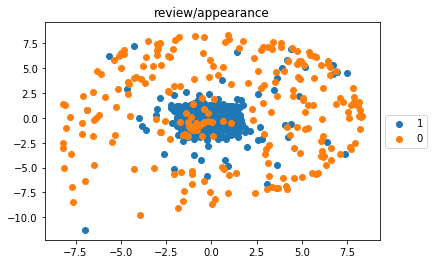

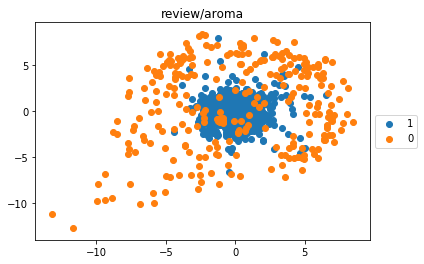

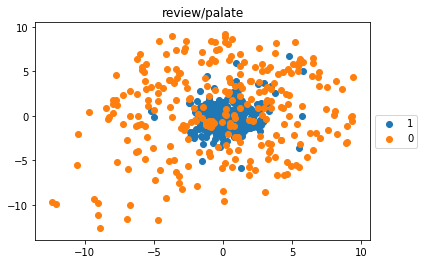

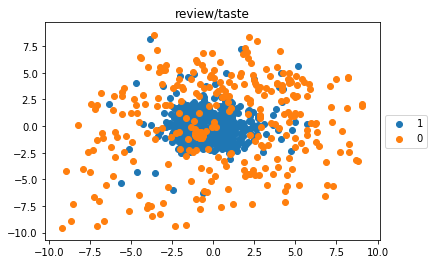

In [50]:
import matplotlib.pyplot as plt
for aspect in aspects :
    aspect1 = aspect_maps[int(aspect)]
    #vals = sample_ds['beer/style'].unique()
    vals = sample_ds[aspect1].unique()
    for key in vals :
        idxs = sample_ds[sample_ds[aspect1] == key].index
        plt.scatter(pcas[aspect][idxs, 0], pcas[aspect][idxs, 1], label=key)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(aspect1)
    plt.show()